In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#!pip install apyori
from apyori import apriori

  Preparing metadata (setup.py) ... - \ done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=3ceb84c8f3897819907ec43db6af620696f68459e807d4900e5d4f05d1e6cf6d
  Stored in directory: /home/datalore/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


# Асоціативні зв'язки

Apriori — алгоритм глибинного аналізу даних щодо частих одиниць у множинах і машинного навчання щодо асоціативних правил, що застосовується переважно до баз даних транзакцій. Алгоритм ідентифікує елементи/одиниці, що часто повторюються у базі, і розширює їх список до все більших множин з дотриманням правила достатньої частотності. Визначені алгоритмом множини частих одиниць можна використати для визначення правил асоціювання, по яких стають помітними загальні тенденції в базі даних.

In [4]:
# https://drive.google.com/file/d/1y5DYn0dGoSbC22xowBq2d4po6h1JxcTQ/view

store_data = pd.read_csv('store_data.csv', header=None)

In [5]:
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
store_data.shape

(7501, 20)

In [7]:
records = []
for i in range(0, 7501):
    records.append([str(store_data.values[i,j]) for j in range(0, 20)  ])

In [8]:
records

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [9]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3)

In [10]:
association_rules

<generator object apriori at 0x7f3c0f3efeb0>

In [11]:
for item in association_rules:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1] )

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: chocolate -> frozen vegetables
Support: 0.005332622317024397
Con

# Зменшення розмірності

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

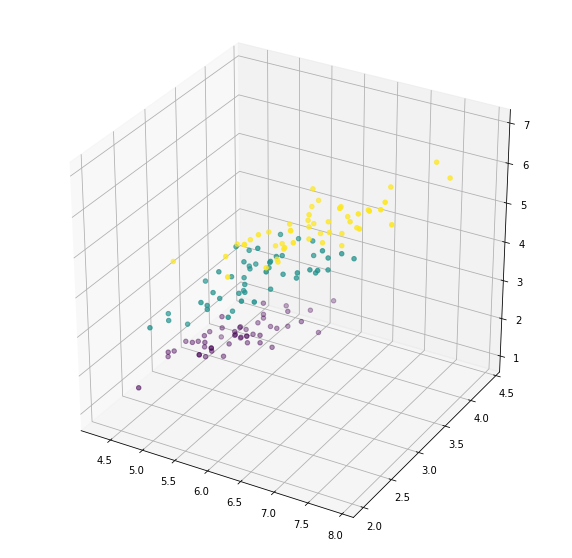

<Figure size 720x720 with 1 Axes>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris.data[: ,0], iris.data[: ,1], iris.data[: ,2], c=iris.target)

In [ ]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(iris.data)

In [ ]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
new_data = model.fit_transform(data)

In [ ]:
model.n_components_ 

2

In [ ]:
model.n_features_  

4

In [ ]:
model.explained_variance_ratio_ 

array([0.72962445, 0.22850762])

In [ ]:
sum(model.explained_variance_ratio_)

0.9581320720000164

In [ ]:
x = pd.DataFrame(new_data, columns=['Col 1', 'Col 2'])
y = pd.DataFrame(iris.target, columns=['Class'])

In [ ]:
df = pd.concat([x, y], axis=1)

In [ ]:
df

,Col 1,Col 2,Class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


        Col 1     Col 2  Class
0   -2.264703  0.480027      0
1   -2.080961 -0.674134      0
2   -2.364229 -0.341908      0
3   -2.299384 -0.597395      0
4   -2.389842  0.646835      0
..        ...       ...    ...
145  1.870503  0.386966      2
146  1.564580 -0.896687      2
147  1.521170  0.269069      2
148  1.372788  1.011254      2
149  0.960656 -0.024332      2

[150 rows x 3 columns]

In [ ]:
# використаємо пізніше
x_axis = df['Col 1']
y_axis = df['Col 2']

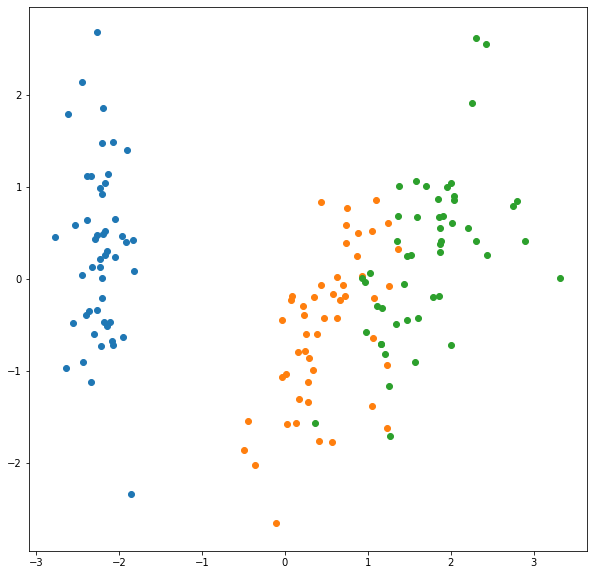

<Figure size 720x720 with 1 Axes>

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
target = set(iris.target)

for cl in target:
    ax.scatter(
        df[df['Class']==cl]['Col 1'],
        df[df['Class']==cl]['Col 2']  )

# Агломеративний алгоритм

https://habr.com/ru/company/hh/blog/427477/

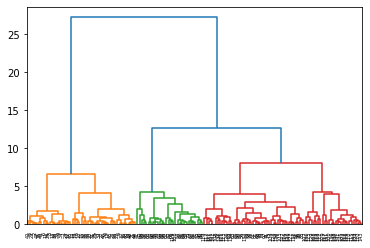

<Figure size 432x288 with 1 Axes>

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram


mergings = linkage(data,  method='ward')

dendrogram(mergings,
            leaf_rotation=90, color_threshold=10)
plt.show()

In [ ]:
linkage

<function scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)>

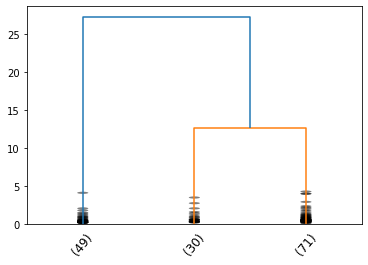

<Figure size 432x288 with 1 Axes>

In [ ]:
dendrogram(mergings,
           truncate_mode='lastp',   
           p=3,  
           leaf_rotation=50,
           show_contracted=True)

plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3)

y_hc = hc.fit_predict(data)

from sklearn import metrics
# https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

metrics.silhouette_score(data, y_hc)

0.4466890410285909

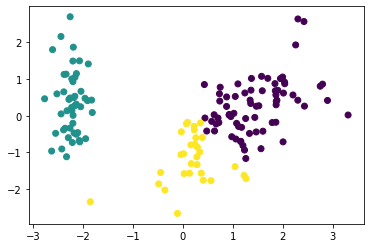

<Figure size 432x288 with 1 Axes>

In [ ]:
plt.scatter(x_axis, y_axis, c=y_hc)
plt.show()

# KMeans

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)


model.fit(data)


predicted_label = model.predict([[-2, -0.5, -0.8, 1]])
predicted_label

array([2])

In [ ]:
all_predictions = model.predict(data)

In [ ]:
all_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
acc = 0
for i in range(len(all_predictions)):
    if all_predictions[0] == df['Class'][0]:
        acc+=1
print(acc/len(all_predictions))    

0.0


In [ ]:
df['Class']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int32

In [ ]:
metrics.silhouette_score(data, all_predictions)

0.45937792074496636

In [ ]:
model.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

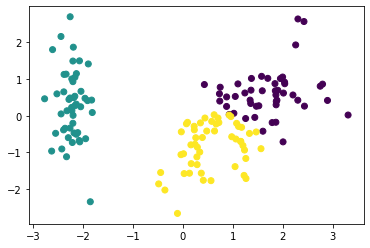

<Figure size 432x288 with 1 Axes>

In [ ]:
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

Text(0, 0.5, 'Inertia')

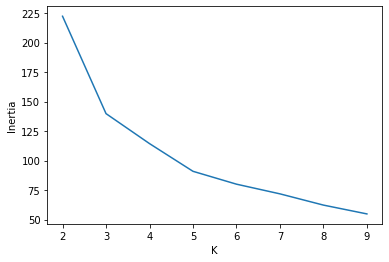

<Figure size 432x288 with 1 Axes>

In [ ]:
inertias = []
sizes = range(2, 10)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(data)
    inertias.append(k2.inertia_)

fig, ax= plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")

# Приклад

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from typing import Tuple

In [ ]:
image = img_as_float(imread("logo-main.png"))

In [ ]:
image.shape

(59, 161, 4)

In [ ]:
w, h, d = image.shape
pixels = pd.DataFrame(np.reshape(image, (w*h, d)), columns=["R", "G", "B", 'F'])
pixels.head()

,R,G,B,F
0,0.278431,0.439216,0.298039,0.0
1,0.278431,0.439216,0.298039,0.0
2,0.278431,0.439216,0.298039,0.0
3,0.278431,0.439216,0.298039,0.0
4,0.278431,0.439216,0.298039,0.0


          R         G         B    F
0  0.278431  0.439216  0.298039  0.0
1  0.278431  0.439216  0.298039  0.0
2  0.278431  0.439216  0.298039  0.0
3  0.278431  0.439216  0.298039  0.0
4  0.278431  0.439216  0.298039  0.0

In [ ]:
def cluster_pixels(pixels, n_clusters):
    pixels = pixels.copy()

    model = KMeans(n_clusters=n_clusters, init="k-means++", random_state=241)
    pixels["cluster"] = model.fit_predict(pixels)

    return pixels

def mean_median_image(pixels):
    means = pixels.groupby("cluster").mean().values
    mean_pixels = np.array([means[c] for c in pixels["cluster"]])
    mean_image = np.reshape(mean_pixels, (w, h, d))

    medians = pixels.groupby("cluster").median().values
    median_pixels = np.array([medians[c] for c in pixels["cluster"]])
    median_image = np.reshape(median_pixels, (w, h, d))

    return mean_image, median_image

In [ ]:
# Інженери зазвичай використовують PSNR для вимірювання якості реконструйованих зображень, які були стиснені. 
# Кожен елемент зображення (піксель) має значення кольору, яке може змінюватися при стисненні, а потім стисненні зображення.
# Сигнали можуть мати широкий динамічний діапазон, тому PSNR зазвичай виражається в децибелах, що є логарифмічною шкалою.

def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10.0 * np.log10(1.0 / mse)

Clustering: 1



PSNR (mean): 12.73
PSNR (median): 11.29


Clustering: 2



PSNR (mean): 19.95
PSNR (median): 18.93


Clustering: 3


PSNR (mean): 22.50
PSNR (median): 21.40


Clustering: 4


PSNR (mean): 25.00
PSNR (median): 24.09


Clustering: 5


PSNR (mean): 27.61
PSNR (median): 27.07


Clustering: 6


PSNR (mean): 29.85
PSNR (median): 29.23


Clustering: 7


PSNR (mean): 31.10
PSNR (median): 30.59





C:\Users\i.betlei\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)



C:\Users\i.betlei\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)














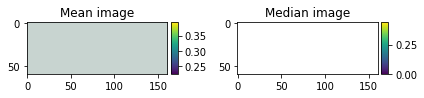

<Figure size 432x288 with 4 Axes>

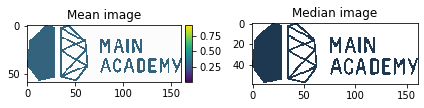

<Figure size 432x288 with 3 Axes>

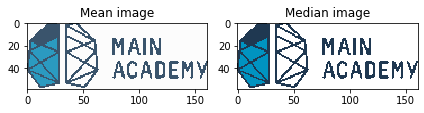

<Figure size 432x288 with 2 Axes>

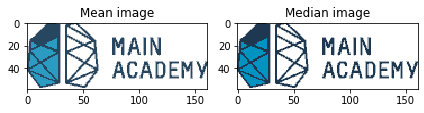

<Figure size 432x288 with 2 Axes>

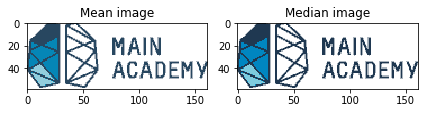

<Figure size 432x288 with 2 Axes>

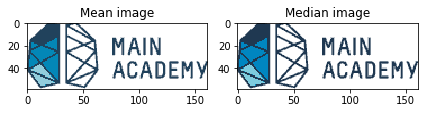

<Figure size 432x288 with 2 Axes>

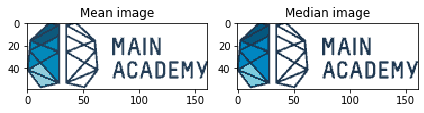

<Figure size 432x288 with 2 Axes>

In [ ]:
def show_images(mean_image, median_image):
    fig=plt.figure()

    ax = fig.add_subplot(1, 2, 1)
    ax.title.set_text("Mean image")
    imshow(mean_image)

    ax = fig.add_subplot(1, 2, 2)
    ax.title.set_text("Median image")
    imshow(median_image)
    
    plt.show()

for n in range(1, 20):
    print(f"Clustering: {n}")
    
    cpixels = cluster_pixels(pixels, n)
    mean_image, median_image = mean_median_image(cpixels)
    show_images(mean_image, median_image)
    
    psnr_mean, psnr_median = psnr(image, mean_image), psnr(image, median_image)
    print(f"PSNR (mean): {psnr_mean:.2f}\nPSNR (median): {psnr_median:.2f}\n\n")
    
    if psnr_mean > 30 or psnr_median > 30:
        break

In [ ]:
import numpy as np

def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],10) 
        self.weights2   = np.random.rand(10,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  
                            (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) 
                             * sigmoid_derivative(self.layer1)))

        
        self.weights1 += d_weights1
        self.weights2 += d_weights2


if __name__ == "__main__":
    X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
    y = np.array([[0],[1],[1],[0]])
    
    nn = NeuralNetwork(X,y)

    for i in range(2000):
        nn.feedforward()
        nn.backprop()

    print(nn.output)

[[0.01607815]
 [0.98427151]
 [0.98155287]
 [0.0175702 ]]


In [ ]:
#!pip install keras
#!pip install tensorflow --upgrade

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
np.random.seed(9)

model = Sequential()

# Hidden Layer (Layer 1)
model.add(Dense(units=4, activation='sigmoid', input_dim=3))
# Output Layer
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())
print('')

sgd = optimizers.SGD(lr=1)
model.compile(loss='mean_squared_error', optimizer=sgd)

X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])

history = model.fit(X, y, epochs=1500)


print(model.predict(X))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None

Epoch 1/1500
1/1 [==============================] - 0s 453ms/step - loss: 0.3197
Epoch 2/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.2942
Epoch 3/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.2745
Epoch 4/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.2622
Epoch 5/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.2559
Epoch 6/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.2531
Epoch 7/1500
1/1 [====================

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist        
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print( x_train.shape )

model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])


model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train, y_train_cat, batch_size=32, epochs=3)

model.evaluate(x_test, y_test_cat)

(60000, 28, 28, 1)
Epoch 1/3
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1261 - accuracy: 0.9615
Epoch 2/3
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0409 - accuracy: 0.9876
Epoch 3/3
313/313 [==============================] - 3s 8ms/step - loss: 0.0353 - accuracy: 0.9894



[0.035286057740449905, 0.9894000291824341]

In [ ]:
x_train.shape

(60000, 28, 28, 1)